## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [2]:
salary = pd.read_csv('Employee_Salary.csv')

In [3]:
salary.head()

,Years of Experience,Salary
0,1.000000,40000.00000
1,2.257942,65979.42119
2,2.450875,67253.57549
3,2.498713,67342.43510
4,2.613729,70532.20448


In [4]:
salary.tail()

,Years of Experience,Salary
1995,19.178575,421534.6910
1996,19.254499,430478.0265
1997,19.353369,438090.8454
1998,19.842520,482242.1608
1999,20.000000,500000.0000


In [5]:
salary.describe()

,Years of Experience,Salary
count,2000.000000,2000.000000
mean,10.739095,111942.422469
std,2.989853,45055.817085
min,1.000000,40000.000000
25%,8.812255,87938.130895
50%,10.738822,93376.356875
75%,12.785483,116978.641550
max,20.000000,500000.000000


In [6]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
Years of Experience    2000 non-null float64
Salary                 2000 non-null float64
dtypes: float64(2)
memory usage: 31.4 KB


## Visualize the Data

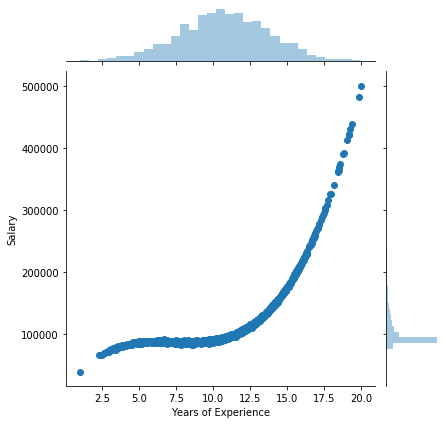

In [8]:
sns.jointplot(x= 'Years of Experience', y='Salary', data=salary)

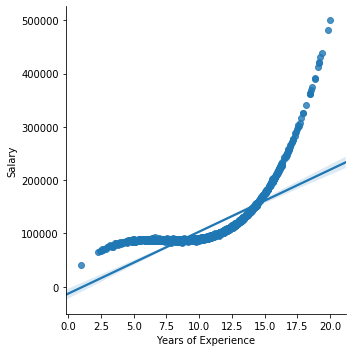

In [9]:
sns.lmplot(x= 'Years of Experience', y='Salary', data=salary)

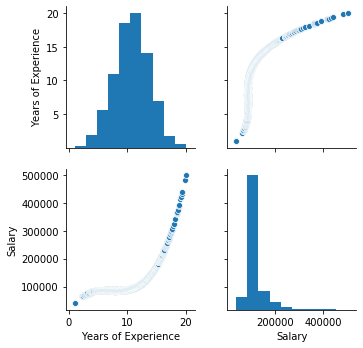

In [10]:
sns.pairplot(salary)

## Splitting dataset into training and testing data

In [15]:
X = salary[['Years of Experience']]

In [12]:
y = salary['Salary']

In [16]:
X.shape

(2000, 1)

In [14]:
y.shape

(2000,)

In [17]:
X_train = X
y_train = y

## Model - 1 ( Linear Model )

## Model Training

In [18]:
from sklearn.linear_model import LinearRegression

In [60]:
regressor = LinearRegression(fit_intercept=False)

In [61]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [62]:
print('Linear Model coef (m): ', regressor.coef_)
print('Linear Model coef (b): ', regressor.intercept_)

Linear Model coef (m):  [10511.28514602]
Linear Model coef (b):  0.0


In [26]:
# Fit intercept = True
# Linear Model coef (m):  [11640.22916165]
# Linear Model coef (b):  -13063.099315186904
# Fit intercept = False
# Linear Model coef (m):  [10511.28514602]
# Linear Model coef (b):  0.0

## Visualize the result

Text(0.5, 1.0, 'Salary vs Years of Experience ( Linear )')

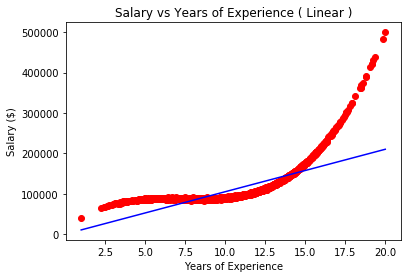

In [28]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.title('Salary vs Years of Experience ( Linear )')

## Model - 2 ( Polynomial )

## Model Training

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [49]:
poly_regressor = PolynomialFeatures(degree = 5)

In [50]:
X_columns = poly_regressor.fit_transform(X_train)

In [51]:
X_columns

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 2.25794198e+00, 5.09830199e+00, 1.15116701e+01,
        2.59926832e+01, 5.86899707e+01],
       [1.00000000e+00, 2.45087546e+00, 6.00679053e+00, 1.47218955e+01,
        3.60815324e+01, 8.84313424e+01],
       ...,
       [1.00000000e+00, 1.93533688e+01, 3.74552884e+02, 7.24886009e+03,
        1.40289863e+05, 2.71508145e+06],
       [1.00000000e+00, 1.98425197e+01, 3.93725587e+02, 7.81250771e+03,
        1.55019838e+05, 3.07598419e+06],
       [1.00000000e+00, 2.00000000e+01, 4.00000000e+02, 8.00000000e+03,
        1.60000000e+05, 3.20000000e+06]])

In [52]:
regressor = LinearRegression()
regressor.fit(X_columns, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
print('Linear Model coef (m): ', regressor.coef_)

Linear Model coef (m):  [ 0.00000000e+00  3.27949771e+04 -4.65578675e+03  2.24001236e+02
 -1.03521070e+00  2.09284278e-02]


## Visualize the Result

In [54]:
y_predict = regressor.predict(poly_regressor.fit_transform(X_train))

Text(0.5, 1.0, 'Salary vs Years of Experience (Poly order = 5)')

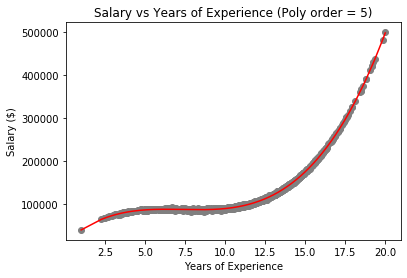

In [56]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, y_predict, color='red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($)')
plt.title('Salary vs Years of Experience (Poly order = 5)')